In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings("ignore") 

In [203]:
df=pd.read_csv("StudentsPerformance.csv")

In [204]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


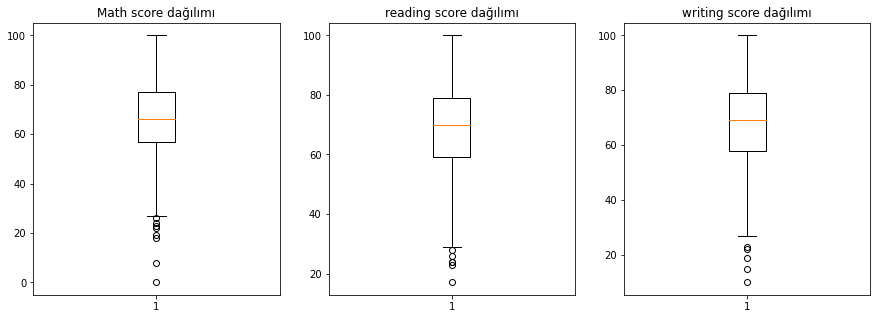

In [206]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(df["math score"])
plt.title("Math score dağılımı")

plt.subplot(1,3,2)
plt.boxplot(df["reading score"])
plt.title("reading score dağılımı")

plt.subplot(1,3,3)
plt.boxplot(df["writing score"])
plt.title("writing score dağılımı")
plt.show()

Yukarıda ki aykırı değerleri çıkarabiliriz ortalamayı düşürecekler. bir bakalım önce log alıp ya da winsorize edip.

In [207]:
df["winsorize_math score"] = winsorize(df["math score"], (0.007, 0))
df["winsorize_reading score"] = winsorize(df["reading score"], (0.006, 0))
df["winsorize_writing score"] = winsorize(df["writing score"], (0.005, 0))

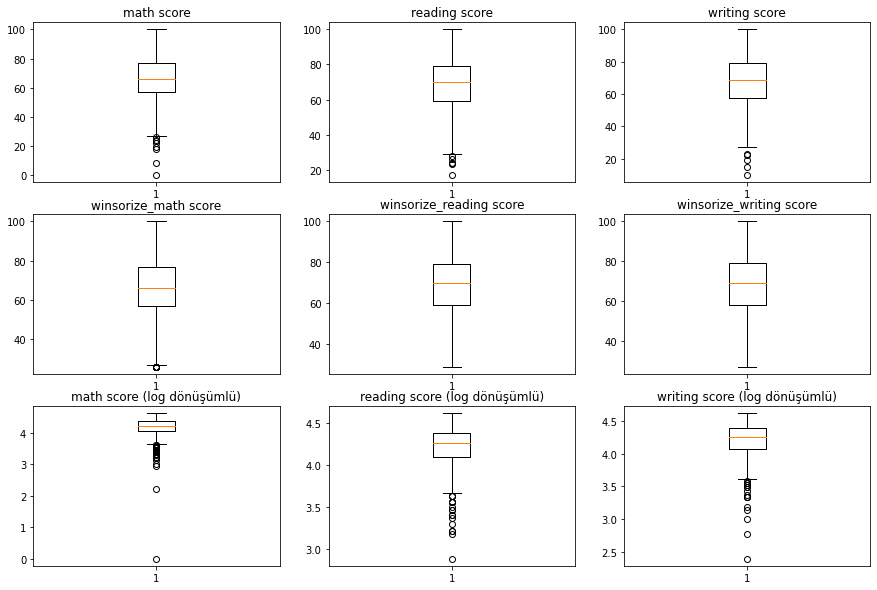

In [208]:
degiskenler = ['math score', 'reading score' , 'writing score']
winsorize_degiskenler = ['winsorize_math score', 'winsorize_reading score', 'winsorize_writing score']
plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.boxplot(df[degiskenler[i]])
    plt.title(degiskenler[i])
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.boxplot(df[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i])
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.boxplot(np.log(df[degiskenler[i]]+1))
    plt.title(degiskenler[i] + ' (log dönüşümlü)')

Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

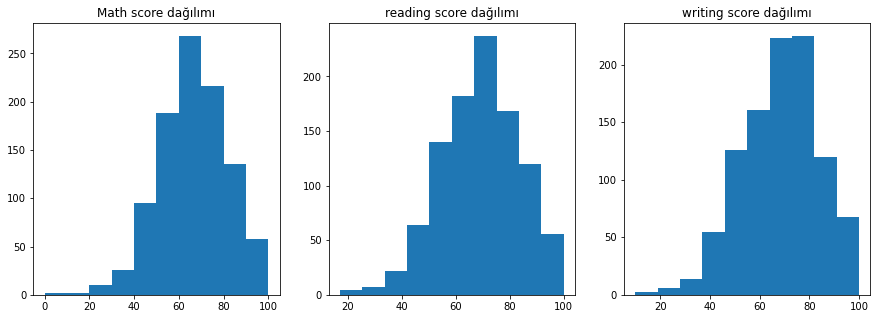

In [209]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(df["math score"])
plt.title("Math score dağılımı")

plt.subplot(1,3,2)
plt.hist(df["reading score"])
plt.title("reading score dağılımı")

plt.subplot(1,3,3)
plt.hist(df["writing score"])
plt.title("writing score dağılımı")
plt.show()

Yukarıdaki dağılım normale benzemiyor.
Aşağıda istatiksel test ile bakalım.

In [210]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["math score", "reading score", "writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera((df[ozellik]))
    norm_stats = normaltest((df[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,15.91226,0.00035,15.40896,0.00045
1,reading score,11.38330,0.00337,11.11741,0.00385
2,writing score,13.98509,0.00092,13.60645,0.00111


JB(PValue>0.05)= Accept Ho (Normal Distribution)
JB(PValue<0.05)= Reject Ho (Non-Normal Distribution)
Normal dağılmıyor.

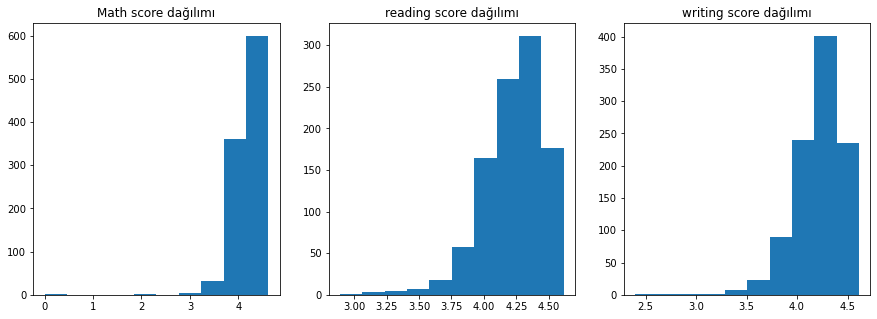

In [211]:
#log alalım ki o zaman daha normalden uzaklaştı. normallik testlerin p value 0 geldi normal değildir.
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(np.log(df["math score"]+1))
plt.title("Math score dağılımı")

plt.subplot(1,3,2)
plt.hist(np.log(df["reading score"]+1))
plt.title("reading score dağılımı")

plt.subplot(1,3,3)
plt.hist(np.log(df["writing score"]+1))
plt.title("writing score dağılımı")
plt.show()

Winsorize edilmiş halleri ile normallik testi yapacağım.

In [212]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["winsorize_math score", "winsorize_reading score", "winsorize_writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera((df[ozellik]))
    norm_stats = normaltest((df[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,winsorize_math score,5.75858,0.05617,5.86693,0.05321
1,winsorize_reading score,9.76094,0.00759,10.10159,0.00640
2,winsorize_writing score,11.64095,0.00297,12.66339,0.00178


Winsorize edilmiş hali math score değişkeni normal dağılım olarak kabul edebiliriz. 

Ancak diğer değerler normal değil. Onun çin box-cox dönüşümü deneyelim.

In [213]:
#df["math score"] =df[df["math score"] > 0]
df["math score"].sort_values().unique()

array([  0,   8,  18,  19,  22,  23,  24,  26,  27,  28,  29,  30,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100], dtype=int64)

In [214]:
df=df[df["math score"] > 0]

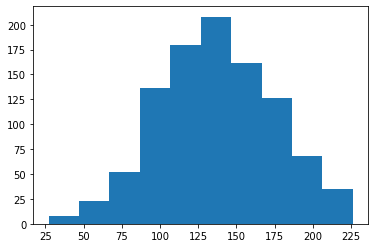

In [215]:
math_n, _ = stats.boxcox(df["math score"])
plt.hist(xt)
plt.show()

In [216]:
jarque_bera((math_n))

Jarque_beraResult(statistic=1.7200983116596507, pvalue=0.4231412819456758)

In [217]:
normaltest((math_n))

NormaltestResult(statistic=1.8323076599006014, pvalue=0.40005476451814015)

Normal dağıldığını testlerden gördük. Diğer değişkenlere de yapalım.

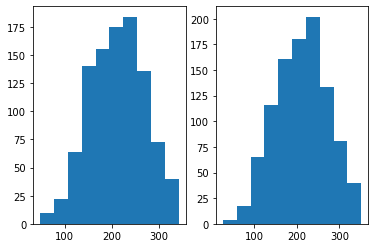

In [218]:
reading, _ = stats.boxcox(df["reading score"])
plt.subplot(1,2,1)
plt.hist(reading)
writing, _ = stats.boxcox(df["writing score"])
plt.subplot(1,2,2)
plt.hist(writing)
plt.show()


In [219]:
jarque_bera((reading)),jarque_bera((writing))

(Jarque_beraResult(statistic=4.8891540799411395, pvalue=0.08676282434883942),
 Jarque_beraResult(statistic=5.762346713079429, pvalue=0.05606893537015201))

In [220]:
normaltest((reading)),normaltest((writing))

(NormaltestResult(statistic=6.546500254297637, pvalue=0.03788310187455936),
 NormaltestResult(statistic=8.018367650263817, pvalue=0.018148201299612785))

In [221]:
df["math_n"]= math_n
df["reading_n"]= reading
df["writing_n"]= writing

In [222]:
df["ort"]=(df["math_n"] +df["reading_n"] +df["writing_n"] )/3

In [223]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorize_math score,winsorize_reading score,winsorize_writing score,math_n,reading_n,writing_n,ort
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,74,179.63865,220.70023,234.64102,211.65997
1,female,group C,some college,standard,completed,69,90,88,69,90,88,170.13920,297.16797,295.96476,254.42398
2,female,group B,master's degree,standard,none,90,95,93,90,95,93,238.79621,319.36764,318.70377,292.28921


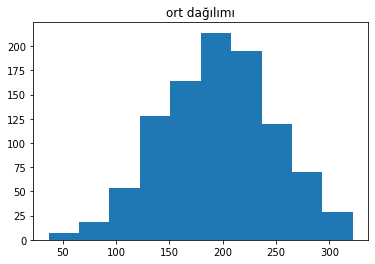

In [224]:
plt.hist(df["ort"])
plt.title("ort dağılımı")
plt.show()


In [225]:
jarque_bera((df["ort"]))


Jarque_beraResult(statistic=3.711239944919365, pvalue=0.15635597622063147)

In [226]:
normaltest((df["ort"]))

NormaltestResult(statistic=4.471808220604883, pvalue=0.10689544088156801)

3 değişkenin ortalamasınında normal dağıldığını gördük.

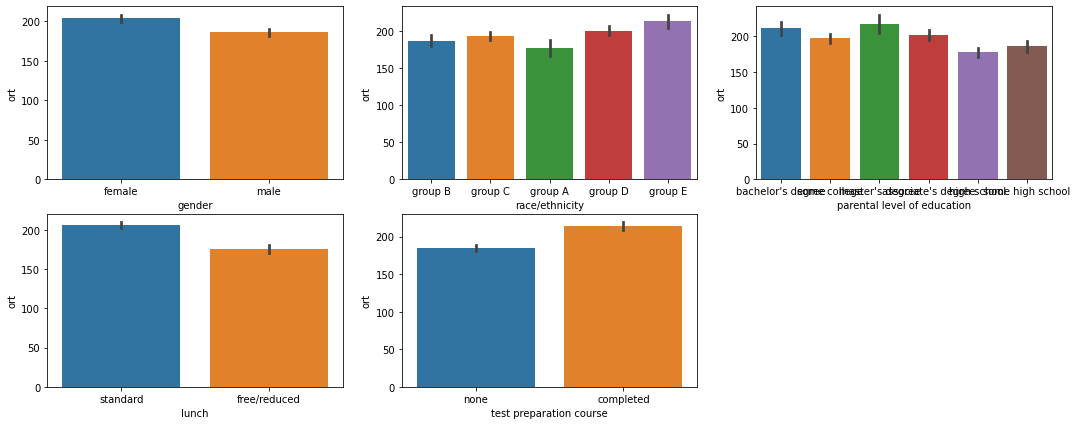

In [227]:
#hedef değişken sürekli , diğer hepsi kategorik bunları grafiklerde bakıp t testi yapıp karar verebiliriz.
plt.figure(figsize=(18,7))

plt.subplot(2,3,1)
sns.barplot(df["gender"], df["ort"])


plt.subplot(2,3,2)
sns.barplot(df["race/ethnicity"], df["ort"])


plt.subplot(2,3,3)

sns.barplot(df["parental level of education"], df["ort"])


plt.subplot(2,3,4)

sns.barplot(df["lunch"], df["ort"])


plt.subplot(2,3,5)

sns.barplot(df["test preparation course"], df["ort"])


plt.show()

tüm özellikler notları etkiliyor. 